clase
0    86
1    40
2    44
dtype: int64


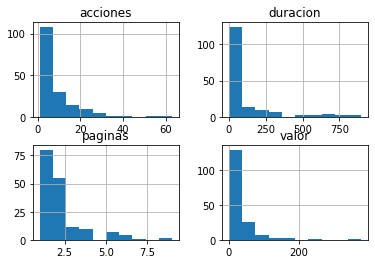

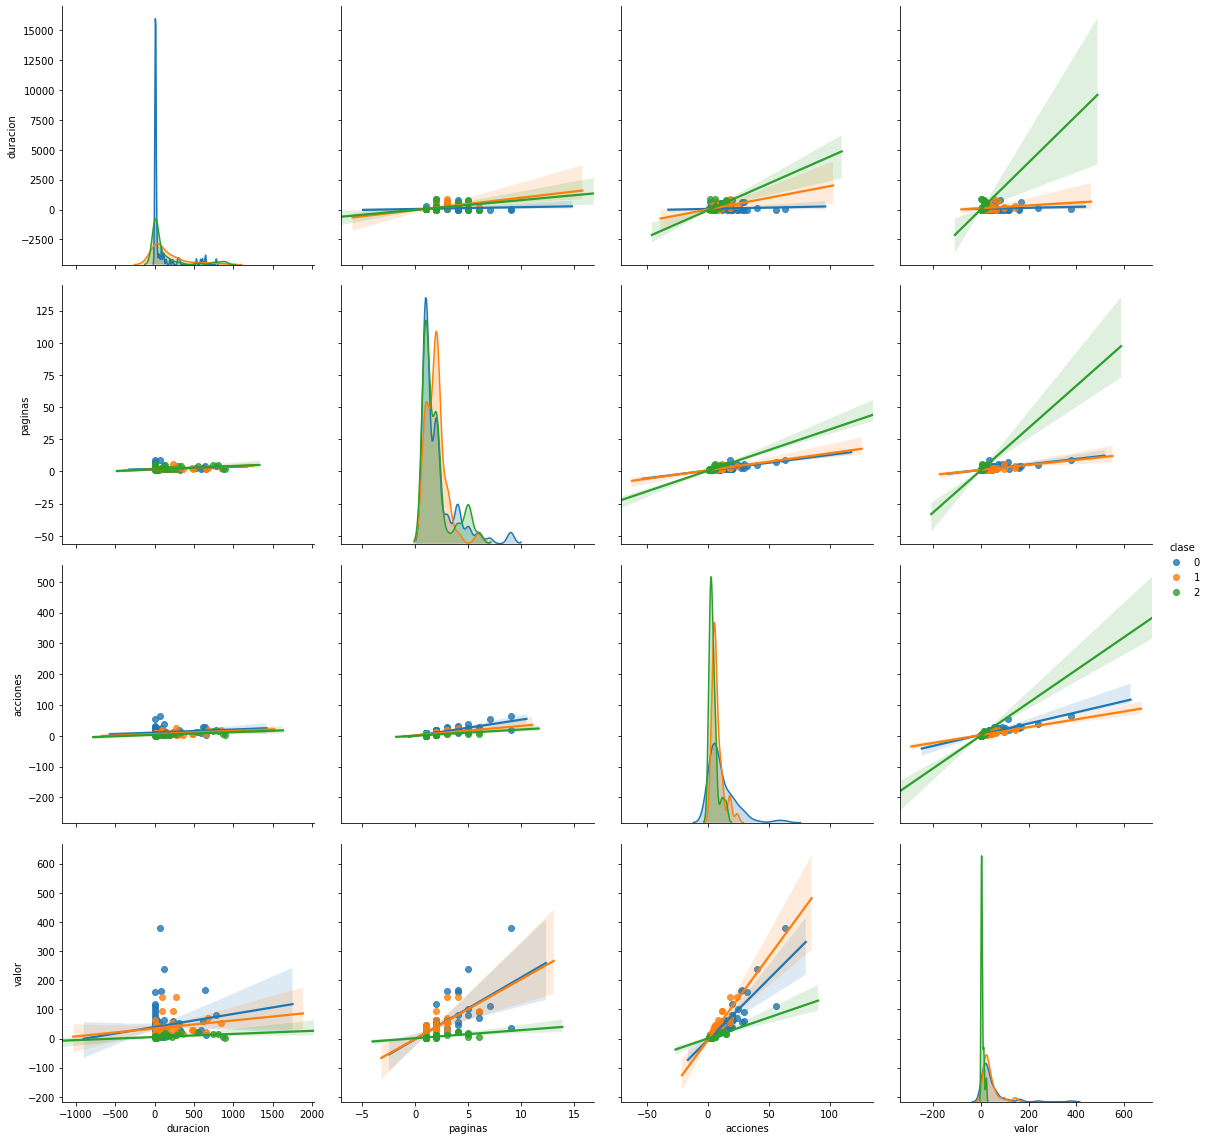

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

dataframe = pd.read_csv("db.csv")
print(dataframe.groupby('clase').size())

dataframe.drop(['clase'],1).hist()
plt.show()

sb.pairplot(dataframe.dropna(), hue='clase',height=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')
plt.show()

x = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
model = linear_model.LogisticRegression()
model.fit(x,y)

In [2]:
predictions = model.predict(x)
print(predictions[0:5])

[2 2 2 2 2]


In [3]:
validation_size = 0.20
seed = 7
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x,y,test_size=validation_size,random_state=seed)
name = 'Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

In [4]:
predictions = model.predict(x_validation)
print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



In [5]:
pasos = 7
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    #input sequence
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1,i)) for j in range(n_vars)]

    #forecast sequence
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1,i)) for j in range(n_vars)]
    
    #put all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    #drop rows with nan value
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [6]:
#load data sets
values = df.values
#ensure all data is float
values = values.astype('float32')
#normalize
scaler = MinMaxScaler(feature_range=(-1,1))
values=values.reshape(-1,1)
scaled = scaler.fit_transform(values)
#frame as supervised learning
reframed = series_to_supervised(scaled, pasos, 1)

#split into train and test
values= reframed.values
n_train_days = 315+289 -(30+pasos)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
#split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
#reshape input to be 3d
x_train = x_train.reshape((x_train.shape[0],1,x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0],1,x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

NameError: name 'df' is not defined